In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
yelp = 'C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Sentiment Analysis\\yelp_labelled.txt'
amazon = 'C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Sentiment Analysis\\amazon_cells_labelled.txt'
imdb = 'C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Sentiment Analysis\\imdb_labelled.txt'
df = pd.read_table(yelp, header=None)
df.columns = ['review','sentiment']

In [3]:
# General Positive Sentiment Classifiers

good = ["a+",
"abound",
"abounds",
"abundance",
"abundant",
"accessable",
"accessible",
"acclaim",
"acclaimed",
"acclamation",
"accolade",
"accolades",
"accommodative",
"accomodative",
"accomplish",
"accomplished",
"accomplishment",
"accomplishments",
"accurate",
"accurately",
"achievable",
"achievement",
"achievements",
"achievible",
"acumen",
"adaptable",
"adaptive",
"adequate",
"adjustable",
"admirable",
"admirably",
"admiration",
"admire",
"admirer",
"admiring",
"admiringly",
"adorable",
"adore",
"adored",
"adorer",
"adoring",
"adoringly",
"adroit",
"adroitly",
"adulate",
"adulation",
"adulatory",
"advanced",
"advantage",
"advantageous",
"advantageously",
"advantages",
"adventuresome",
"adventurous",
"advocate",
"advocated",
"advocates",
"affability",
"affable",
"affably",
"affectation",
"affection",
"affectionate",
"affinity",
"affirm",
"affirmation",
"affirmative",
"affluence",
"affluent",
"afford",
"affordable",
"affordably",
"afordable",
"agile",
"agilely",
"agility",
"agreeable",
"agreeableness",
"agreeably",
"all-around",
"alluring",
"alluringly",
"altruistic",
"altruistically",
"amaze",
"amazed",
"amazement",
"amazes",
"amazing",
"amazingly",
"ambitious",
"ambitiously",
"ameliorate",
"amenable",
"amenity",
"amiability",
"amiabily",
"amiable",
"amicability",
"amicable",
"amicably",
"amity",
"ample",
"amply",
"amuse",
"amusing",
"amusingly",
"angel",
"angelic",
"apotheosis",
"appeal",
"appealing",
"applaud",
"appreciable",
"appreciate",
"appreciated",
"appreciates",
"appreciative",
"appreciatively",
"appropriate",
"approval",
"approve",
"ardent",
"ardently",
"ardor",
"articulate",
"aspiration",
"aspirations",
"aspire",
"assurance",
"assurances",
"assure",
"assuredly",
"assuring",
"astonish",
"astonished",
"astonishing",
"astonishingly",
"astonishment",
"astound",
"astounded",
"astounding",
"astoundingly",
"astutely",
"attentive",
"attraction",
"attractive",
"attractively",
"attune",
"audible",
"audibly",
"auspicious",
"authentic",
"authoritative",
"autonomous",
"available",
"aver",
"avid",
"avidly",
"award",
"awarded",
"awards",
"awe",
"awed",
"awesome",
"awesomely",
"awesomeness",
"awestruck",
"awsome",
"backbone",
"balanced",
"bargain",
"beauteous",
"beautiful",
"beautifullly",
"beautifully",
"beautify",
"beauty",
"beckon",
"beckoned",
"beckoning",
"beckons",
"believable",
"believeable",
"beloved",
"benefactor",
"beneficent",
"beneficial",
"beneficially",
"beneficiary",
"benefit",
"benefits",
"benevolence",
"benevolent",
"benifits",
"best",
"best-known",
"best-performing",
"best-selling",
"better",
"better-known",
"better-than-expected",
"beutifully",
"blameless",
"bless",
"blessing",
"bliss",
"blissful",
"blissfully",
"blithe",
"blockbuster",
"bloom",
"blossom",
"bolster",
"bonny",
"bonus",
"bonuses",
"boom",
"booming",
"boost",
"boundless",
"bountiful",
"brainiest",
"brainy",
"brand-new",
"brave",
"bravery",
"bravo",
"breakthrough",
"breakthroughs",
"breathlessness",
"breathtaking",
"breathtakingly",
"breeze",
"bright",
"brighten",
"brighter",
"brightest",
"brilliance",
"brilliances",
"brilliant",
"brilliantly",
"brisk",
"brotherly",
"bullish",
"buoyant",
"cajole",
"calm",
"calming",
"calmness",
"capability",
"capable",
"capably",
"captivate",
"captivating",
"carefree",
"cashback",
"cashbacks",
"catchy",
"celebrate",
"celebrated",
"celebration",
"celebratory",
"champ",
"champion",
"charisma",
"charismatic",
"charitable",
"charm",
"charming",
"charmingly",
"chaste",
"cheaper",
"cheapest",
"cheer",
"cheerful",
"cheery",
"cherish",
"cherished",
"cherub",
"chic",
"chivalrous",
"chivalry",
"civility",
"civilize",
"clarity",
"classic",
"classy",
"clean",
"cleaner",
"cleanest",
"cleanliness",
"cleanly",
"clear",
"clear-cut",
"cleared",
"clearer",
"clearly",
"clears",
"clever",
"cleverly",
"cohere",
"coherence",
"coherent",
"cohesive",
"colorful",
"comely",
"comfort",
"comfortable",
"comfortably",
"comforting",
"comfy",
"commend",
"commendable",
"commendably",
"commitment",
"commodious",
"compact",
"compactly",
"compassion",
"compassionate",
"compatible",
"competitive",
"complement",
"complementary",
"complemented",
"complements",
"compliant",
"compliment",
"complimentary",
"comprehensive",
"conciliate",
"conciliatory",
"concise",
"confidence",
"confident",
"congenial",
"congratulate",
"congratulation",
"congratulations",
"congratulatory",
"conscientious",
"considerate",
"consistent",
"consistently",
"constructive",
"consummate",
"contentment",
"continuity",
"contrasty",
"contribution",
"convenience",
"convenient",
"conveniently",
"convience",
"convienient",
"convient",
"convincing",
"convincingly",
"cool",
"coolest",
"cooperative",
"cooperatively",
"cornerstone",
"correct",
"correctly",
"cost-effective",
"cost-saving",
"counter-attack",
"counter-attacks",
"courage",
"courageous",
"courageously",
"courageousness",
"courteous",
"courtly",
"covenant",
"cozy",
"creative",
"credence",
"credible",
"crisp",
"crisper",
"cure",
"cure-all",
"cushy",
"cute",
"cuteness",
"danke",
"danken",
"daring",
"daringly",
"darling",
"dashing",
"dauntless",
"dawn",
"dazzle",
"dazzled",
"dazzling",
"dead-cheap",
"dead-on",
"decency",
"decent",
"decisive",
"decisiveness",
"dedicated",
"defeat",
"defeated",
"defeating",
"defeats",
"defender",
"deference",
"deft",
"deginified",
"delectable",
"delicacy",
"delicate",
"delicious",
"delight",
"delighted",
"delightful",
"delightfully",
"delightfulness",
"dependable",
"dependably",
"deservedly",
"deserving",
"desirable",
"desiring",
"desirous",
"destiny",
"detachable",
"devout",
"dexterous",
"dexterously",
"dextrous",
"dignified",
"dignify",
"dignity",
"diligence",
"diligent",
"diligently",
"diplomatic",
"dirt-cheap",
"distinction",
"distinctive",
"distinguished",
"diversified",
"divine",
"divinely",
"dominate",
"dominated",
"dominates",
"dote",
"dotingly",
"doubtless",
"dreamland",
"dumbfounded",
"dumbfounding",
"dummy-proof",
"durable",
"dynamic",
"eager",
"eagerly",
"eagerness",
"earnest",
"earnestly",
"earnestness",
"ease",
"eased",
"eases",
"easier",
"easiest",
"easiness",
"easing",
"easy",
"easy-to-use",
"easygoing",
"ebullience",
"ebullient",
"ebulliently",
"ecenomical",
"economical",
"ecstasies",
"ecstasy",
"ecstatic",
"ecstatically",
"edify",
"educated",
"effective",
"effectively",
"effectiveness",
"effectual",
"efficacious",
"efficient",
"efficiently",
"effortless",
"effortlessly",
"effusion",
"effusive",
"effusively",
"effusiveness",
"elan",
"elate",
"elated",
"elatedly",
"elation",
"electrify",
"elegance",
"elegant",
"elegantly",
"elevate",
"elite",
"eloquence",
"eloquent",
"eloquently",
"embolden",
"eminence",
"eminent",
"empathize",
"empathy",
"empower",
"empowerment",
"enchant",
"enchanted",
"enchanting",
"enchantingly",
"encourage",
"encouragement",
"encouraging",
"encouragingly",
"endear",
"endearing",
"endorse",
"endorsed",
"endorsement",
"endorses",
"endorsing",
"energetic",
"energize",
"energy-efficient",
"energy-saving",
"engaging",
"engrossing",
"enhance",
"enhanced",
"enhancement",
"enhances",
"enjoy",
"enjoyable",
"enjoyably",
"enjoyed",
"enjoying",
"enjoyment",
"enjoys",
"enlighten",
"enlightenment",
"enliven",
"ennoble",
"enough",
"enrapt",
"enrapture",
"enraptured",
"enrich",
"enrichment",
"enterprising",
"entertain",
"entertaining",
"entertains",
"enthral",
"enthrall",
"enthralled",
"enthuse",
"enthusiasm",
"enthusiast",
"enthusiastic",
"enthusiastically",
"entice",
"enticed",
"enticing",
"enticingly",
"entranced",
"entrancing",
"entrust",
"enviable",
"enviably",
"envious",
"enviously",
"enviousness",
"envy",
"equitable",
"ergonomical",
"err-free",
"erudite",
"ethical",
"eulogize",
"euphoria",
"euphoric",
"euphorically",
"evaluative",
"evenly",
"eventful",
"everlasting",
"evocative",
"exalt",
"exaltation",
"exalted",
"exaltedly",
"exalting",
"exaltingly",
"examplar",
"examplary",
"excallent",
"exceed",
"exceeded",
"exceeding",
"exceedingly",
"exceeds",
"excel",
"exceled",
"excelent",
"excellant",
"excelled",
"excellence",
"excellency",
"excellent",
"excellently",
"excels",
"exceptional",
"exceptionally",
"excite",
"excited",
"excitedly",
"excitedness",
"excitement",
"excites",
"exciting",
"excitingly",
"exellent",
"exemplar",
"exemplary",
"exhilarate",
"exhilarating",
"exhilaratingly",
"exhilaration",
"exonerate",
"expansive",
"expeditiously",
"expertly",
"exquisite",
"exquisitely",
"extol",
"extoll",
"extraordinarily",
"extraordinary",
"exuberance",
"exuberant",
"exuberantly",
"exult",
"exultant",
"exultation",
"exultingly",
"eye-catch",
"eye-catching",
"eyecatch",
"eyecatching",
"fabulous",
"fabulously",
"facilitate",
"fair",
"fairly",
"fairness",
"faith",
"faithful",
"faithfully",
"faithfulness",
"fame",
"famed",
"famous",
"famously",
"fancier",
"fancinating",
"fancy",
"fanfare",
"fans",
"fantastic",
"fantastically",
"fascinate",
"fascinating",
"fascinatingly",
"fascination",
"fashionable",
"fashionably",
"fast",
"fast-growing",
"fast-paced",
"faster",
"fastest",
"fastest-growing",
"faultless",
"fav",
"fave",
"favor",
"favorable",
"favored",
"favorite",
"favorited",
"favour",
"fearless",
"fearlessly",
"feasible",
"feasibly",
"feat",
"feature-rich",
"fecilitous",
"feisty",
"felicitate",
"felicitous",
"felicity",
"fertile",
"fervent",
"fervently",
"fervid",
"fervidly",
"fervor",
"festive",
"fidelity",
"fiery",
"fine",
"fine-looking",
"finely",
"finer",
"finest",
"firmer",
"first-class",
"first-in-class",
"first-rate",
"flashy",
"flatter",
"flattering",
"flatteringly",
"flawless",
"flawlessly",
"flexibility",
"flexible",
"flourish",
"flourishing",
"fluent",
"flutter",
"fond",
"fondly",
"fondness",
"foolproof",
"foremost",
"foresight",
"formidable",
"fortitude",
"fortuitous",
"fortuitously",
"fortunate",
"fortunately",
"fortune",
"fragrant",
"free",
"freed",
"freedom",
"freedoms",
"fresh",
"fresher",
"freshest",
"friendliness",
"friendly",
"frolic",
"frugal",
"fruitful",
"ftw",
"fulfillment",
"fun",
"futurestic",
"futuristic",
"gaiety",
"gaily",
"gain",
"gained",
"gainful",
"gainfully",
"gaining",
"gains",
"gallant",
"gallantly",
"galore",
"geekier",
"geeky",
"gem",
"gems",
"generosity",
"generous",
"generously",
"genial",
"genius",
"gentle",
"gentlest",
"genuine",
"gifted",
"glad",
"gladden",
"gladly",
"gladness",
"glamorous",
"glee",
"gleeful",
"gleefully",
"glimmer",
"glimmering",
"glisten",
"glistening",
"glitter",
"glitz",
"glorify",
"glorious",
"gloriously",
"glory",
"glow",
"glowing",
"glowingly",
"god-given",
"god-send",
"godlike",
"godsend",
"gold",
"golden",
"good",
"goodly",
"goodness",
"goodwill",
"goood",
"gooood",
"gorgeous",
"gorgeously",
"grace",
"graceful",
"gracefully",
"gracious",
"graciously",
"graciousness",
"grand",
"grandeur",
"grateful",
"gratefully",
"gratification",
"gratified",
"gratifies",
"gratify",
"gratifying",
"gratifyingly",
"gratitude",
"great",
"greatest",
"greatness",
"grin",
"groundbreaking",
"guarantee",
"guidance",
"guiltless",
"gumption",
"gush",
"gusto",
"gutsy",
"hail",
"halcyon",
"hale",
"hallmark",
"hallmarks",
"hallowed",
"handier",
"handily",
"hands-down",
"handsome",
"handsomely",
"handy",
"happier",
"happily",
"happiness",
"happy",
"hard-working",
"hardier",
"hardy",
"harmless",
"harmonious",
"harmoniously",
"harmonize",
"harmony",
"headway",
"heal",
"healthful",
"healthy",
"hearten",
"heartening",
"heartfelt",
"heartily",
"heartwarming",
"heaven",
"heavenly",
"helped",
"helpful",
"helping",
"hero",
"heroic",
"heroically",
"heroine",
"heroize",
"heros",
"high-quality",
"high-spirited",
"hilarious",
"holy",
"homage",
"honest",
"honesty",
"honor",
"honorable",
"honored",
"honoring",
"hooray",
"hopeful",
"hospitable",
"hot",
"hotcake",
"hotcakes",
"hottest",
"hug",
"humane",
"humble",
"humility",
"humor",
"humorous",
"humorously",
"humour",
"humourous",
"ideal",
"idealize",
"ideally",
"idol",
"idolize",
"idolized",
"idyllic",
"illuminate",
"illuminati",
"illuminating",
"illumine",
"illustrious",
"ilu",
"imaculate",
"imaginative",
"immaculate",
"immaculately",
"immense",
"impartial",
"impartiality",
"impartially",
"impassioned",
"impeccable",
"impeccably",
"important",
"impress",
"impressed",
"impresses",
"impressive",
"impressively",
"impressiveness",
"improve",
"improved",
"improvement",
"improvements",
"improves",
"improving",
"incredible",
"incredibly",
"indebted",
"individualized",
"indulgence",
"indulgent",
"industrious",
"inestimable",
"inestimably",
"inexpensive",
"infallibility",
"infallible",
"infallibly",
"influential",
"ingenious",
"ingeniously",
"ingenuity",
"ingenuous",
"ingenuously",
"innocuous",
"innovation",
"innovative",
"inpressed",
"insightful",
"insightfully",
"inspiration",
"inspirational",
"inspire",
"inspiring",
"instantly",
"instructive",
"instrumental",
"integral",
"integrated",
"intelligence",
"intelligent",
"intelligible",
"interesting",
"interests",
"intimacy",
"intimate",
"intricate",
"intrigue",
"intriguing",
"intriguingly",
"intuitive",
"invaluable",
"invaluablely",
"inventive",
"invigorate",
"invigorating",
"invincibility",
"invincible",
"inviolable",
"inviolate",
"invulnerable",
"irreplaceable",
"irreproachable",
"irresistible",
"irresistibly",
"issue-free",
"jaw-droping",
"jaw-dropping",
"jollify",
"jolly",
"jovial",
"joy",
"joyful",
"joyfully",
"joyous",
"joyously",
"jubilant",
"jubilantly",
"jubilate",
"jubilation",
"jubiliant",
"judicious",
"justly",
"keen",
"keenly",
"keenness",
"kid-friendly",
"kindliness",
"kindly",
"kindness",
"knowledgeable",
"kudos",
"large-capacity",
"laud",
"laudable",
"laudably",
"lavish",
"lavishly",
"law-abiding",
"lawful",
"lawfully",
"lead",
"leading",
"leads",
"lean",
"led",
"legendary",
"leverage",
"levity",
"liberate",
"liberation",
"liberty",
"lifesaver",
"light-hearted",
"lighter",
"likable",
"like",
"liked",
"likes",
"liking",
"lionhearted",
"lively",
"logical",
"long-lasting",
"lovable",
"lovably",
"love",
"loved",
"loveliness",
"lovely",
"lover",
"loves",
"loving",
"low-cost",
"low-price",
"low-priced",
"low-risk",
"lower-priced",
"loyal",
"loyalty",
"lucid",
"lucidly",
"luck",
"luckier",
"luckiest",
"luckiness",
"lucky",
"lucrative",
"luminous",
"lush",
"luster",
"lustrous",
"luxuriant",
"luxuriate",
"luxurious",
"luxuriously",
"luxury",
"lyrical",
"magic",
"magical",
"magnanimous",
"magnanimously",
"magnificence",
"magnificent",
"magnificently",
"majestic",
"majesty",
"manageable",
"maneuverable",
"marvel",
"marveled",
"marvelled",
"marvellous",
"marvelous",
"marvelously",
"marvelousness",
"marvels",
"master",
"masterful",
"masterfully",
"masterpiece",
"masterpieces",
"masters",
"mastery",
"matchless",
"mature",
"maturely",
"maturity",
"meaningful",
"memorable",
"merciful",
"mercifully",
"mercy",
"merit",
"meritorious",
"merrily",
"merriment",
"merriness",
"merry",
"mesmerize",
"mesmerized",
"mesmerizes",
"mesmerizing",
"mesmerizingly",
"meticulous",
"meticulously",
"mightily",
"mighty",
"mind-blowing",
"miracle",
"miracles",
"miraculous",
"miraculously",
"miraculousness",
"modern",
"modest",
"modesty",
"momentous",
"monumental",
"monumentally",
"morality",
"motivated",
"multi-purpose",
"navigable",
"neat",
"neatest",
"neatly",
"nice",
"nicely",
"nicer",
"nicest",
"nifty",
"nimble",
"noble",
"nobly",
"noiseless",
"non-violence",
"non-violent",
"notably",
"noteworthy",
"nourish",
"nourishing",
"nourishment",
"novelty",
"nurturing",
"oasis",
"obsession",
"obsessions",
"obtainable",
"openly",
"openness",
"optimal",
"optimism",
"optimistic",
"opulent",
"orderly",
"originality",
"outdo",
"outdone",
"outperform",
"outperformed",
"outperforming",
"outperforms",
"outshine",
"outshone",
"outsmart",
"outstanding",
"outstandingly",
"outstrip",
"outwit",
"ovation",
"overjoyed",
"overtake",
"overtaken",
"overtakes",
"overtaking",
"overtook",
"overture",
"pain-free",
"painless",
"painlessly",
"palatial",
"pamper",
"pampered",
"pamperedly",
"pamperedness",
"pampers",
"panoramic",
"paradise",
"paramount",
"pardon",
"passion",
"passionate",
"passionately",
"patience",
"patient",
"patiently",
"patriot",
"patriotic",
"peace",
"peaceable",
"peaceful",
"peacefully",
"peacekeepers",
"peach",
"peerless",
"pep",
"pepped",
"pepping",
"peppy",
"peps",
"perfect",
"perfection",
"perfectly",
"permissible",
"perseverance",
"persevere",
"personages",
"personalized",
"phenomenal",
"phenomenally",
"picturesque",
"piety",
"pinnacle",
"playful",
"playfully",
"pleasant",
"pleasantly",
"pleased",
"pleases",
"pleasing",
"pleasingly",
"pleasurable",
"pleasurably",
"pleasure",
"plentiful",
"pluses",
"plush",
"plusses",
"poetic",
"poeticize",
"poignant",
"poise",
"poised",
"polished",
"polite",
"politeness",
"popular",
"portable",
"posh",
"positive",
"positively",
"positives",
"powerful",
"powerfully",
"praise",
"praiseworthy",
"praising",
"pre-eminent",
"precious",
"precise",
"precisely",
"preeminent",
"prefer",
"preferable",
"preferably",
"prefered",
"preferes",
"preferring",
"prefers",
"premier",
"prestige",
"prestigious",
"prettily",
"pretty",
"priceless",
"pride",
"principled",
"privilege",
"privileged",
"prize",
"proactive",
"problem-free",
"problem-solver",
"prodigious",
"prodigiously",
"prodigy",
"productive",
"productively",
"proficient",
"proficiently",
"profound",
"profoundly",
"profuse",
"profusion",
"progress",
"progressive",
"prolific",
"prominence",
"prominent",
"promise",
"promised",
"promises",
"promising",
"promoter",
"prompt",
"promptly",
"proper",
"properly",
"propitious",
"propitiously",
"pros",
"prosper",
"prosperity",
"prosperous",
"prospros",
"protect",
"protection",
"protective",
"proud",
"proven",
"proves",
"providence",
"proving",
"prowess",
"prudence",
"prudent",
"prudently",
"punctual",
"pure",
"purify",
"purposeful",
"quaint",
"qualified",
"qualify",
"quicker",
"quiet",
"quieter",
"radiance",
"radiant",
"rapid",
"rapport",
"rapt",
"rapture",
"raptureous",
"raptureously",
"rapturous",
"rapturously",
"rational",
"razor-sharp",
"reachable",
"readable",
"readily",
"ready",
"reaffirm",
"reaffirmation",
"realistic",
"realizable",
"reasonable",
"reasonably",
"reasoned",
"reassurance",
"reassure",
"receptive",
"reclaim",
"recomend",
"recommend",
"recommendation",
"recommendations",
"recommended",
"reconcile",
"reconciliation",
"record-setting",
"recover",
"recovery",
"rectification",
"rectify",
"rectifying",
"redeem",
"redeeming",
"redemption",
"refine",
"refined",
"refinement",
"reform",
"reformed",
"reforming",
"reforms",
"refresh",
"refreshed",
"refreshing",
"refund",
"refunded",
"regal",
"regally",
"regard",
"rejoice",
"rejoicing",
"rejoicingly",
"rejuvenate",
"rejuvenated",
"rejuvenating",
"relaxed",
"relent",
"reliable",
"reliably",
"relief",
"relish",
"remarkable",
"remarkably",
"remedy",
"remission",
"remunerate",
"renaissance",
"renewed",
"renown",
"renowned",
"replaceable",
"reputable",
"reputation",
"resilient",
"resolute",
"resound",
"resounding",
"resourceful",
"resourcefulness",
"respect",
"respectable",
"respectful",
"respectfully",
"respite",
"resplendent",
"responsibly",
"responsive",
"restful",
"restored",
"restructure",
"restructured",
"restructuring",
"retractable",
"revel",
"revelation",
"revere",
"reverence",
"reverent",
"reverently",
"revitalize",
"revival",
"revive",
"revives",
"revolutionary",
"revolutionize",
"revolutionized",
"revolutionizes",
"reward",
"rewarding",
"rewardingly",
"rich",
"richer",
"richly",
"richness",
"right",
"righten",
"righteous",
"righteously",
"righteousness",
"rightful",
"rightfully",
"rightly",
"rightness",
"risk-free",
"robust",
"rock-star",
"rock-stars",
"rockstar",
"rockstars",
"romantic",
"romantically",
"romanticize",
"roomier",
"roomy",
"rosy",
"safe",
"safely",
"sagacity",
"sagely",
"saint",
"saintliness",
"saintly",
"salutary",
"salute",
"sane",
"satisfactorily",
"satisfactory",
"satisfied",
"satisfies",
"satisfy",
"satisfying",
"satisified",
"saver",
"savings",
"savior",
"savvy",
"scenic",
"seamless",
"seasoned",
"secure",
"securely",
"selective",
"self-determination",
"self-respect",
"self-satisfaction",
"self-sufficiency",
"self-sufficient",
"sensation",
"sensational",
"sensationally",
"sensations",
"sensible",
"sensibly",
"sensitive",
"serene",
"serenity",
"sexy",
"sharp",
"sharper",
"sharpest",
"shimmering",
"shimmeringly",
"shine",
"shiny",
"significant",
"silent",
"simpler",
"simplest",
"simplified",
"simplifies",
"simplify",
"simplifying",
"sincere",
"sincerely",
"sincerity",
"skill",
"skilled",
"skillful",
"skillfully",
"slammin",
"sleek",
"slick",
"smart",
"smarter",
"smartest",
"smartly",
"smile",
"smiles",
"smiling",
"smilingly",
"smitten",
"smooth",
"smoother",
"smoothes",
"smoothest",
"smoothly",
"snappy",
"snazzy",
"sociable",
"soft",
"softer",
"solace",
"solicitous",
"solicitously",
"solid",
"solidarity",
"soothe",
"soothingly",
"sophisticated",
"soulful",
"soundly",
"soundness",
"spacious",
"sparkle",
"sparkling",
"spectacular",
"spectacularly",
"speedily",
"speedy",
"spellbind",
"spellbinding",
"spellbindingly",
"spellbound",
"spirited",
"spiritual",
"splendid",
"splendidly",
"splendor",
"spontaneous",
"sporty",
"spotless",
"sprightly",
"stability",
"stabilize",
"stable",
"stainless",
"standout",
"state-of-the-art",
"stately",
"statuesque",
"staunch",
"staunchly",
"staunchness",
"steadfast",
"steadfastly",
"steadfastness",
"steadiest",
"steadiness",
"steady",
"stellar",
"stellarly",
"stimulate",
"stimulates",
"stimulating",
"stimulative",
"stirringly",
"straighten",
"straightforward",
"streamlined",
"striking",
"strikingly",
"striving",
"strong",
"stronger",
"strongest",
"stunned",
"stunning",
"stunningly",
"stupendous",
"stupendously",
"sturdier",
"sturdy",
"stylish",
"stylishly",
"stylized",
"suave",
"suavely",
"sublime",
"subsidize",
"subsidized",
"subsidizes",
"subsidizing",
"substantive",
"succeed",
"succeeded",
"succeeding",
"succeeds",
"succes",
"success",
"successes",
"successful",
"successfully",
"suffice",
"sufficed",
"suffices",
"sufficient",
"sufficiently",
"suitable",
"sumptuous",
"sumptuously",
"sumptuousness",
"super",
"superb",
"superbly",
"superior",
"superiority",
"supple",
"support",
"supported",
"supporter",
"supporting",
"supportive",
"supports",
"supremacy",
"supreme",
"supremely",
"supurb",
"supurbly",
"surmount",
"surpass",
"surreal",
"survival",
"survivor",
"sustainability",
"sustainable",
"swank",
"swankier",
"swankiest",
"swanky",
"sweeping",
"sweet",
"sweeten",
"sweetheart",
"sweetly",
"sweetness",
"swift",
"swiftness",
"talent",
"talented",
"talents",
"tantalize",
"tantalizing",
"tantalizingly",
"tempt",
"tempting",
"temptingly",
"tenacious",
"tenaciously",
"tenacity",
"tender",
"tenderly",
"terrific",
"terrifically",
"thank",
"thankful",
"thinner",
"thoughtful",
"thoughtfully",
"thoughtfulness",
"thrift",
"thrifty",
"thrill",
"thrilled",
"thrilling",
"thrillingly",
"thrills",
"thrive",
"thriving",
"thumb-up",
"thumbs-up",
"tickle",
"tidy",
"time-honored",
"timely",
"tingle",
"titillate",
"titillating",
"titillatingly",
"togetherness",
"tolerable",
"toll-free",
"top",
"top-notch",
"top-quality",
"topnotch",
"tops",
"tough",
"tougher",
"toughest",
"traction",
"tranquil",
"tranquility",
"transparent",
"treasure",
"tremendously",
"trendy",
"triumph",
"triumphal",
"triumphant",
"triumphantly",
"trivially",
"trophy",
"trouble-free",
"trump",
"trumpet",
"trust",
"trusted",
"trusting",
"trustingly",
"trustworthiness",
"trustworthy",
"trusty",
"truthful",
"truthfully",
"truthfulness",
"twinkly",
"ultra-crisp",
"unabashed",
"unabashedly",
"unaffected",
"unassailable",
"unbeatable",
"unbiased",
"unbound",
"uncomplicated",
"unconditional",
"undamaged",
"undaunted",
"understandable",
"undisputable",
"undisputably",
"undisputed",
"unencumbered",
"unequivocal",
"unequivocally",
"unfazed",
"unfettered",
"unforgettable",
"unity",
"unlimited",
"unmatched",
"unparalleled",
"unquestionable",
"unquestionably",
"unreal",
"unrestricted",
"unrivaled",
"unselfish",
"unwavering",
"upbeat",
"upgradable",
"upgradeable",
"upgraded",
"upheld",
"uphold",
"uplift",
"uplifting",
"upliftingly",
"upliftment",
"upscale",
"usable",
"useable",
"useful",
"user-friendly",
"user-replaceable",
"valiant",
"valiantly",
"valor",
"valuable",
"variety",
"venerate",
"verifiable",
"veritable",
"versatile",
"versatility",
"vibrant",
"vibrantly",
"victorious",
"victory",
"viewable",
"vigilance",
"vigilant",
"virtue",
"virtuous",
"virtuously",
"visionary",
"vivacious",
"vivid",
"vouch",
"vouchsafe",
"warm",
"warmer",
"warmhearted",
"warmly",
"warmth",
"wealthy",
"welcome",
"well",
"well-backlit",
"well-balanced",
"well-behaved",
"well-being",
"well-bred",
"well-connected",
"well-educated",
"well-established",
"well-informed",
"well-intentioned",
"well-known",
"well-made",
"well-managed",
"well-mannered",
"well-positioned",
"well-received",
"well-regarded",
"well-rounded",
"well-run",
"well-wishers",
"wellbeing",
"whoa",
"wholeheartedly",
"wholesome",
"whooa",
"whoooa",
"wieldy",
"willing",
"willingly",
"willingness",
"win",
"windfall",
"winnable",
"winner",
"winners",
"winning",
"wins",
"wisdom",
"wise",
"wisely",
"witty",
"won",
"wonder",
"wonderful",
"wonderfully",
"wonderous",
"wonderously",
"wonders",
"wondrous",
"woo",
"work",
"workable",
"worked",
"works",
"world-famous",
"worth",
"worth-while",
"worthiness",
"worthwhile",
"worthy",
"wow",
"wowed",
"wowing",
"wows",
"yay",
"youthful",
"zeal",
"zenith",
"zest",
"zippy"]

for word in good:
    df[str(word)] = df.review.str.contains(str(word), case=False)

In [4]:
# Reduce to top 30 features with correlation to outcome from list 'good'
top_features = df.corr().sentiment.copy()
top_features.sort_values(ascending=False,inplace=True)
good = list(top_features.iloc[1:60].index)

print (good)

['great', 'good', 'delicious', 'amazing', 'friendly', 'nice', 'love', 'perfect', 'awesome', 'awe', 'fantastic', 'loved', 'excellent', 'excel', 'happy', 'wonder', 'wonderful', 'tender', 'best', 'top', 'fast', 'delight', 'enjoyed', 'fun', 'reasonable', 'credible', 'incredible', 'beautiful', 'attentive', 'fresh', 'fine', 'recommendation', 'interesting', 'outstanding', 'wow', 'eased', 'pleased', 'favorite', 'cool', 'crisp', 'generous', 'perfectly', 'clean', 'lean', 'inexpensive', 'glad', 'reasonably', 'ample', 'assure', 'impeccable', 'prompt', 'comfortable', 'comfort', 'lovely', 'perfection', 'smooth', 'nicest', 'cute', 'seasoned']


In [5]:
# Drop all added columns

cols = list(range(2,2008))
df.drop(df.columns[cols], axis=1, inplace=True)

# Add features for new list 'good'
for word in good:
    df[str(word)] = df.review.str.contains(str(word), case=False)

In [6]:
# # Pick the top 20 features which show up the most

# top_features = df.mean().sort_values(ascending=False)
# top_features = top_features.iloc[1:20]
# good = list(top_features.index)
# print (top_features)

In [7]:
# # Drop all extra columns
# cols = list(range(2,31))
# df.drop(df.columns[cols], axis=1, inplace=True)

# # Add columns for new list 'good'
# for word in good:
#     df[str(word)] = df.review.str.contains(str(word), case=False)

In [8]:
data = df[good]
target = df['sentiment']

bnb = BernoulliNB()

bnb.fit(data,target)
predictions = bnb.predict(data)
conf_mat = confusion_matrix(target,predictions)

print (bnb.score(data,target))

0.801


**Initial Scores using full positive sentiment list:  **  
Amazon: .834  
IMDB: .780  
Yelp: .814  

**Scores after reduction of correlation:  **  
Amazon:  
IMDB:   
Yelp: .801  

**Scores after reduction of correlation + reduction of abundance:  **  
Amazon:  
IMDB:  
Yelp: .732

In [9]:
# Confusion Matrix Plot from sklearn documentation

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[457  43]
 [156 344]]


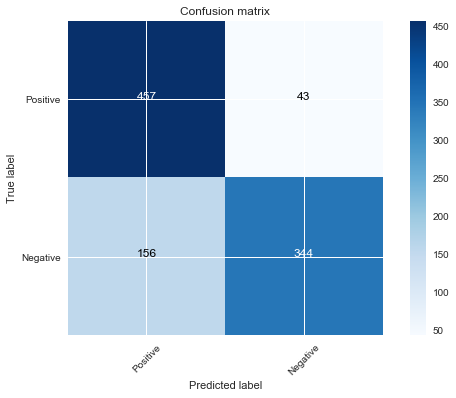

In [10]:
classes = ['Positive','Negative']

plot_confusion_matrix(conf_mat, classes=classes)
plt.show()